In [1]:
## INPUT
name="DescentIntoFuckery"

skill_labels=['ACROBATICS',
 'ANIMAL HANDLING',
 'ARCANA',
 'ATHLETICS',
 'DECEPTION',
 'HISTORY',
 'INSIGHT',
 'INTIMIDATION',
 'INVESTIGATION',
 'MEDICINE',
 'NATURE',
 'PERCEPTION',
 'PERFORMANCE',
 'PERSUASION',
 'RELIGION',
 'SLEIGHT OF HAND',
 'STEALTH',
 'SURVIVAL']

attr_labels=['STRENGTH',
 'DEXTERITY',
 'CONSTITUTION',
 'INTELLIGENCE',
 'WISDOM',
 'CHARISMA']

save_labels=['STRENGTH SAVE',
 'DEXTERITY SAVE',
 'CONSTITUTION SAVE',
 'INTELLIGENCE SAVE',
 'WISDOM SAVE',
 'CHARISMA SAVE',
 'DEATH SAVE']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
%matplotlib inline

df=pd.read_csv("rolls_"+name+".csv",sep=";")
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Day"]=pd.to_datetime(df["Day"])

skills=df[df["Type"]=="Skill"].rename(columns={"Skill/Weapon/Spell": "Skill"})
attacks=df[df["Type"]=="Attack"].rename(columns={"Skill/Weapon/Spell": "Weapon/Spell"})
saves=df[df["Type"]=="Save"].rename(columns={"Skill/Weapon/Spell": "Save"})
other=df[df["Type"]=="Other"].rename(columns={"Skill/Weapon/Spell": "Skill"})

plyr_labels=list(set(df["Player"]))

df

,Player,Timestamp,Skill/Weapon/Spell,Result,Raw,Plus,Final,Type,Day
0,Smallfolk,2021-01-03 19:36:00,STEALTH,25,19,6,1.0,Skill,2021-03-01
1,Kallistē,2021-01-03 19:38:00,DECEPTION,20,17,3,1.0,Skill,2021-03-01
2,Kallistē,2021-01-03 19:38:00,DECEPTION,11,8,3,0.0,Skill,2021-03-01
3,Bethrynne,2021-01-03 19:50:00,HISTORY,8,2,6,1.0,Skill,2021-03-01
4,Smallfolk,2021-01-03 19:50:00,HISTORY,12,12,0,1.0,Skill,2021-03-01
...,...,...,...,...,...,...,...,...,...
340,Smallfolk,2021-02-08 00:38:00,Longbow,23,17,6,0.0,Attack,2021-08-02
341,Smallfolk,2021-02-08 00:38:00,WISDOM SAVE,17,18,-1,1.0,Save,2021-08-02
342,Bethrynne,2021-02-08 00:39:00,ARCANA,10,4,6,1.0,Skill,2021-08-02
343,Bethrynne,2021-02-08 00:39:00,ARCANA,12,6,6,1.0,Skill,2021-08-02


In [3]:
print(df[df["Raw"]>20].shape)
df=df[df["Raw"]<=20]

(0, 9)


## Skillchecks

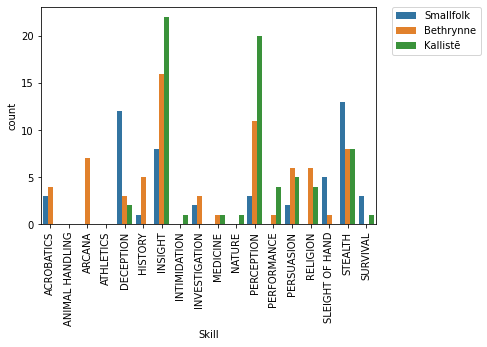

In [4]:
ax = sns.countplot(x="Skill", hue="Player", data=skills[skills["Final"]==1], order=skill_labels,hue_order=plyr_labels)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Count of skillchecks per month and player

In [5]:
skills['Timestamp'].groupby([skills.Timestamp.dt.year, skills.Timestamp.dt.month, skills.Player,df.Final]).agg('count')

Timestamp  Timestamp  Player     Final
2021       1          Bethrynne  0.0       4
                                 1.0      54
                      Kallistē   0.0       4
                                 1.0      57
                      Smallfolk  0.0      10
                                 1.0      41
           2          Bethrynne  0.0       3
                                 1.0      18
                      Kallistē   1.0      12
                      Smallfolk  0.0       4
                                 1.0      11
Name: Timestamp, dtype: int64

Average plusses on skillchecks

## Distribution of rolls

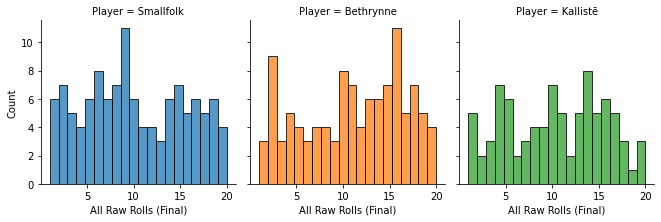

In [6]:
g = sns.FacetGrid(df[df["Final"]==1],col="Player",hue="Player",col_wrap=4,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("All Raw Rolls (Final)", "Count")

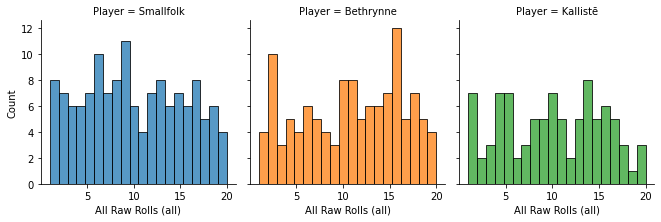

In [7]:
g = sns.FacetGrid(df,col="Player",hue="Player",col_wrap=4,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("All Raw Rolls (all)", "Count")

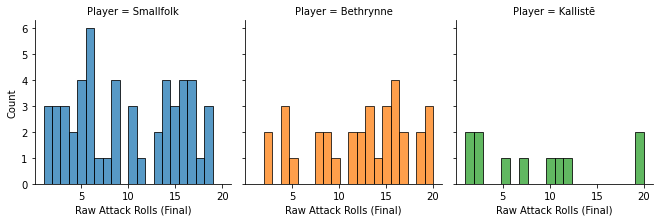

In [8]:
g = sns.FacetGrid(attacks[attacks["Final"]==1],col="Player",hue="Player",col_wrap=4,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (Final)", "Count")

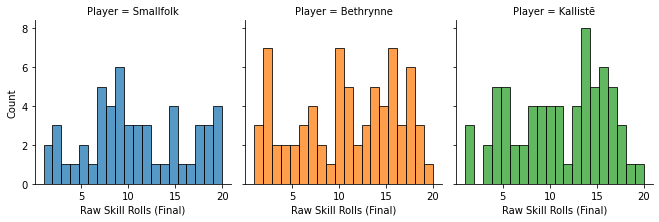

In [9]:
g = sns.FacetGrid(skills[skills["Final"]==1],col="Player",hue="Player",col_wrap=4,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Skill Rolls (Final)", "Count")

In [10]:
df['Raw'].groupby([df.Player]).agg('mean')

Player
Bethrynne    10.905983
Kallistē     10.065934
Smallfolk     9.985401
Name: Raw, dtype: float64

In [11]:
df['Raw'].groupby([df.Player]).agg('std')

Player
Bethrynne    5.676605
Kallistē     5.474795
Smallfolk    5.580936
Name: Raw, dtype: float64

## Crits

In [12]:
crits20=df[(df["Raw"]==20)]
crits1=df[(df["Raw"]==1)]

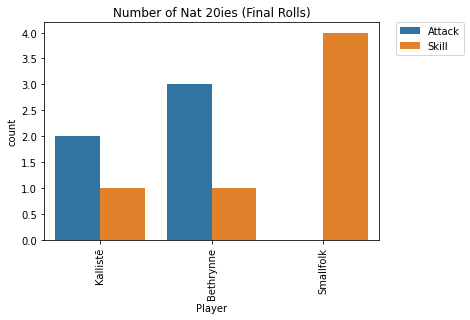

In [13]:
ax = sns.countplot(x="Player",hue="Type", data=crits20[crits20["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 20ies (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

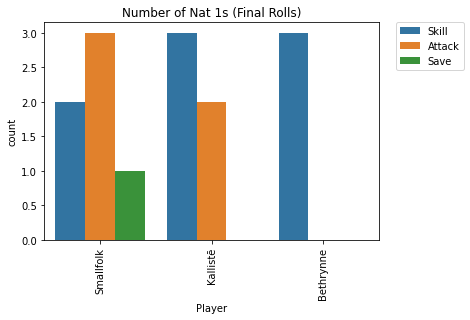

In [14]:
ax = sns.countplot(x="Player",hue="Type", data=crits1[crits1["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 1s (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Saves

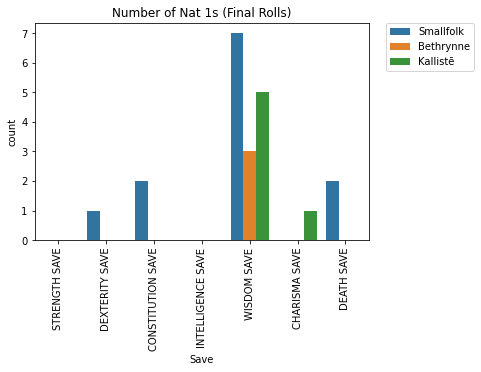

In [15]:
ax = sns.countplot(x="Save",hue="Player", data=saves[saves["Final"]==1],hue_order=plyr_labels,order=save_labels)
plt.xticks(rotation=90)
plt.title("Number of Nat 1s (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)